<div style="
    border: 2px solid #4CAF50; 
    padding: 15px; 
    background-color: #f4f4f4; 
    border-radius: 10px; 
    align-items: center;">

<h1 style="margin: 0; color: #4CAF50;">Einführung Jupyter</h1>
<h2 style="margin: 5px 0; color: #555;">DSAI</h2>
<h3 style="margin: 5px 0; color: #555;">Jakob Eggl</h3>

<div style="flex-shrink: 0;">
    <img src="https://www.htl-grieskirchen.at/wp/wp-content/uploads/2022/11/logo_bildschirm-1024x503.png" alt="Logo" style="width: 250px; height: auto;"/>
</div>
<p1> © 2024/25 Jakob Eggl. Nutzung oder Verbreitung nur mit ausdrücklicher Genehmigung des Autors.</p1>
</div>
<div style="flex: 1;">
</div>   

(Erster Teil inspiriert von https://jupyter.org/try-jupyter/notebooks/?path=notebooks/Intro.ipynb)

Folgendes Notebook dient vor allem als Teaser und als Motivation für all die folgenden Kapitel. Einige, hier erwähnte Punkte, werden in den nächsten Wochen genauer behandelt.

## Installation der Packages:

1. Miniconda Konsole öffnen
2. `activate dsai`
3. `conda install jupyterlab`
4. `conda install matplotlib`
5. `conda install numpy (bereits durch matplotlib installiert)`
6. `conda install scikit-learn`
7. `conda install pandas`
8. `conda install seaborn`

## Ein Beispiel: Visualisierung in einem Notebook

In [3]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn import datasets
import sklearn.linear_model as lm
import pandas as pd
import seaborn as sns

In [4]:
def visualize_data(x, y, scale):
    fig, ax = plt.subplots()
    scatter = ax.scatter(x=x, y=y, c=scale, s=np.abs(scale)*200, label='Data points')
    ax.set(title="Some random data, created with JupyterLab!")
    plt.legend()
    plt.show()

In [5]:
# Daten generieren
x, y, scale = np.random.randn(3, 10000000)  # auch andere Werte möglich

In [6]:
# Plot data
visualize_data(x, y, scale)

c:\Users\tikaiz.DESKTOP-N3LM399\.conda\envs\dsai\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


KeyboardInterrupt: 

## Classification

In [8]:
def load_wine() -> pd.DataFrame:
    """
    Load wine data set [1].

    [1] Forina, M. et al, PARVUS - An Extendible Package for Data Exploration, Classification and Correlation.
        Institute of Pharmaceutical and Food Analysis and Technologies, Via Brigata Salerno, 16147 Genoa, Italy.

    :return: wine data set
    """
    wine_data = datasets.load_wine()
    data = pd.DataFrame(wine_data['data'], columns=wine_data['feature_names'])
    data['target'] = wine_data['target']
    return data

In [9]:
def load_iris() -> pd.DataFrame:
    """
    Load iris data set [1].

    [1] Fisher,R.A. - The use of multiple measurements in taxonomic problems. Annual Eugenics, 7, Part II, 179-188 (1936)

    :return: iris data set
    """
    iris_data = datasets.load_iris()
    new_col_names = [c.replace(" (cm)", "") for c in iris_data["feature_names"]]
    data = pd.DataFrame(iris_data["data"], columns=new_col_names)
    data["target"] = iris_data["target"]
    return data

In [10]:
def load_breast_cancer() -> pd.DataFrame:
    breast_cancer_data = datasets.load_breast_cancer()
    data = pd.DataFrame(breast_cancer_data["data"], columns=breast_cancer_data["feature_names"])
    data["target"] = breast_cancer_data["target"]
    return data

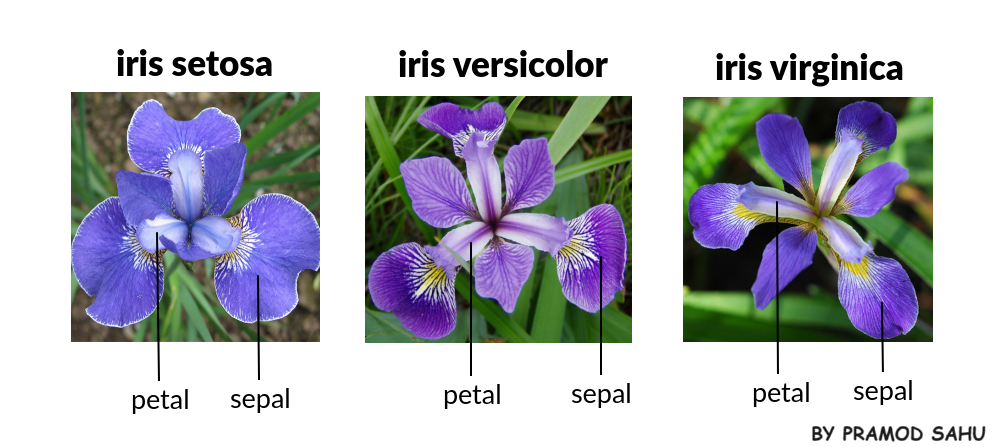

(from https://www.linkedin.com/pulse/iris-dataset-analysis-using-machine-learning-techniques-pramod-sahu-g3kgf/)

In [11]:
data = load_wine()

In [12]:
data = load_breas_cancer()

NameError: name 'load_breas_cancer' is not defined

In [13]:
# unique labels
labels = data['target'].unique() # für Wine dataset cultivator

In [14]:
labels

array([0, 1, 2])

In [15]:
data

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     od280/od315_of_diluted_wines  proline  target  
0                            3.92   1065.0       0  
1                            3.40   1050.0       0  
2                            3.17   1185.0       0  
3                            3.45   1480.0       0  
4                            2.93    735.0       0  
..                            ...      ...     ...  
173                          1.74    740.0       2  
174                          1.56    750.0       2  
175                          1.56    835.0       2  
176                          1.62    840.0       2  
177                          1.60    560.0       2  

[178 rows x 14 columns]

In [16]:
print(data) # does the same as just the end of the previous cell

     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyan

In [17]:
# Pairplot
def plot_pairplot(data, hue, palette, columns):
    sns.pairplot(data, hue=hue, palette=palette, vars=columns)

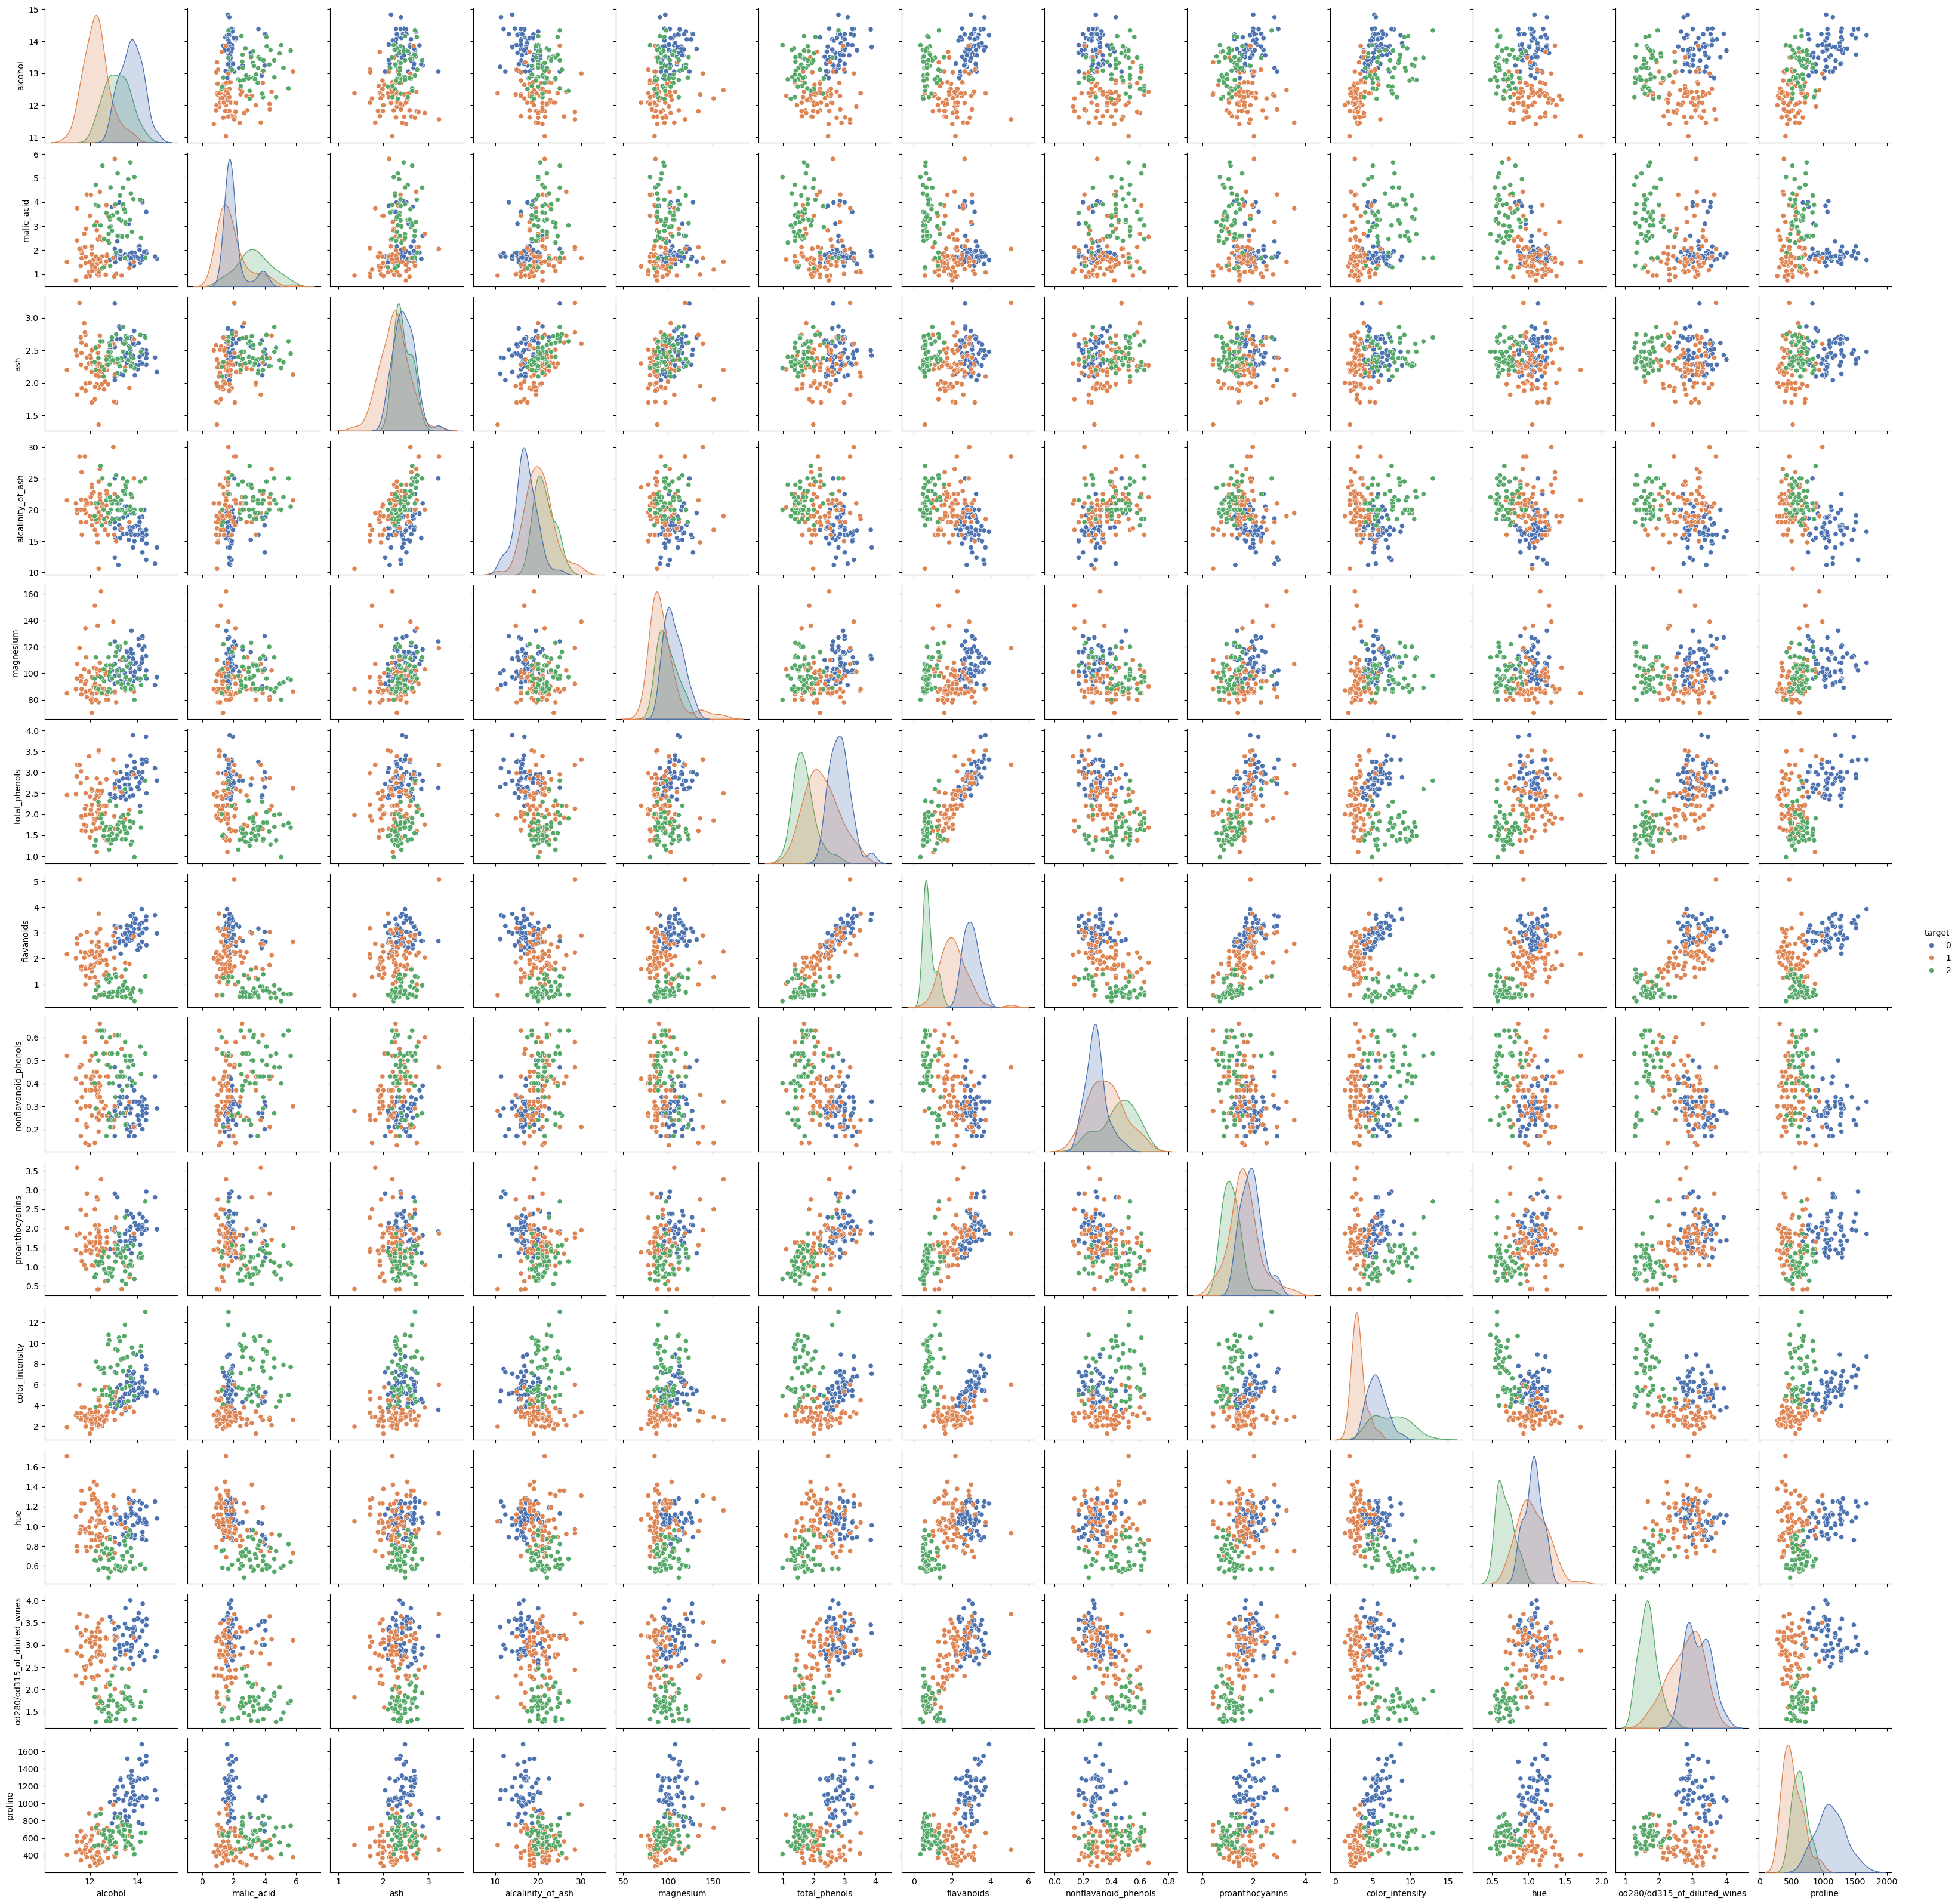

In [18]:
columns = None# all columns

plot_pairplot(data, hue="target", palette="deep", columns=columns) # other palettes: "viridis", "deep", "muted", "pastel", "bright", "dark", "colorblind"

In [29]:
# plot a correlation matrix without the label column

def plot_correlation_matrix(data, columns=None):
    data_no_label = data.drop(columns=['target'])
    if columns is not None:
        data = data_no_label[columns]
    corr = data_no_label.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', center=0) # other colormaps: 'viridis', 'coolwarm', 'magma', 'inferno', 'cividis'

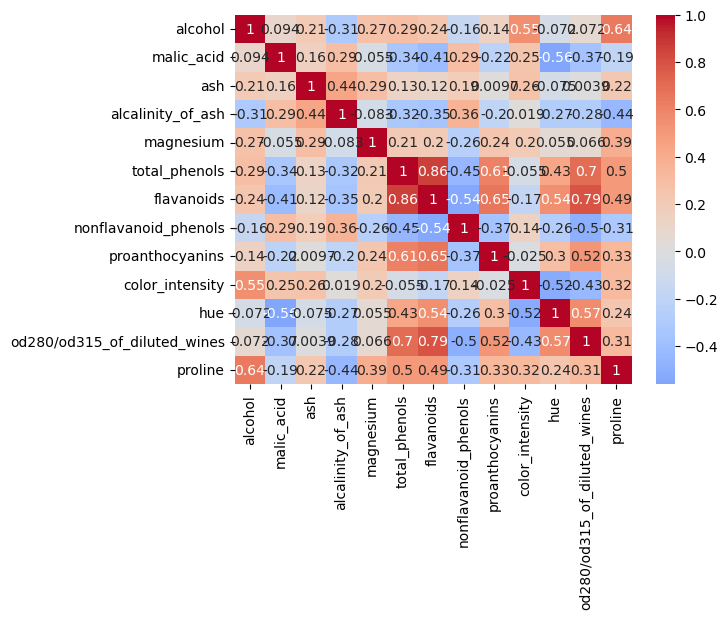

In [30]:
plot_correlation_matrix(data, columns=columns)

Observations:
* Warum Pairplot sinnvoll?
* Wie viele Features gibt es?
* Wie viele Labels?
* Was sagen die einzelnen Plots?
* Was sind die Ranges der einzelnen Daten?
* Gibt es Features, welche nicht/wenig aussagkräftig sind? -> Was genau sagt uns die Korrelationsmatrix?

---

Wir können das gleiche auch mit dem Wine Dataset machen.

---

## Regression

In [33]:
# load diabetes data

# explanation: https://www.geeksforgeeks.org/sklearn-diabetes-dataset/ and https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset

def load_diabetes() -> pd.DataFrame:
    """
    Load diabetes data set [1].

    [1] Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani (2004) "Least Angle Regression," Annals of Statistics (with discussion), 407-499.

    :return: diabetes data set
    """
    diabetes_data = datasets.load_diabetes()
    data = pd.DataFrame(diabetes_data['data'], columns=diabetes_data['feature_names'])
    data['progression'] = diabetes_data['target']
    return data

In [34]:
data = load_diabetes()

In [35]:
data

age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  progression  
0   -0.002592  0.019907 -0.017646        151.0  
1   -0.039493 -0.068332 -0.092204         75.0  
2   -0.002592  0.002861 -0.025930        141.0  
3    0.034309  0.022688 -0.009362        206.0  
4   -0.002592 -0.031988 -0.046641        135.0  
..        ...       ...       ...          ...  
437 -0.002592  0.031193  0.007207        178.0  
438  0.034309 -0.018114  0.044485        104.0  
439 -0.011080 -0.046883  0.015491        132.0  
440  0.026560  0.044529 -0.025930        220.0  
441 -0.039493 -0.004222  0.003064         57.0  

[442 rows x 11 columns]

In [36]:
# regression including plot and its function without the confidence interval
def linear_regression(data: pd.DataFrame, x: str, y: str) -> None:
    """
    Perform linear regression on data. Makes a legend cell which contains the function of the regression.
    """
    # Create linear regression object
    regr = lm.LinearRegression()

    # Train the model using the training sets
    regr.fit(data[x].values.reshape(-1, 1), data[y])

    # Make predictions using the testing set
    y_pred = regr.predict(data[x].values.reshape(-1, 1))

    # Plot outputs
    plt.scatter(data[x], data[y])
    plt.plot(data[x], y_pred, color='blue', linewidth=3)

    # Add legend
    plt.legend([f"y = {regr.coef_[0]:.2f}x + {regr.intercept_:.2f}"])

    # add axis labels
    plt.xlabel(x)
    plt.ylabel(y)

    plt.show()

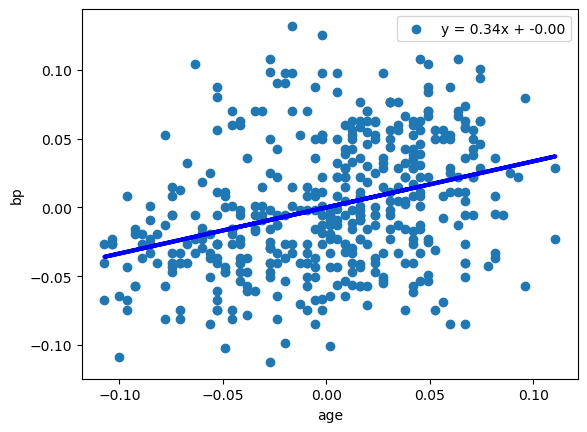

In [37]:
linear_regression(data, "age", "bp") # try other columns

Funktioniert die Interpolation gut?
* Ja/Nein, wieso?

Welches Optimierungsproblem wird hier gelöst? (Wird in ein paar Wochen nochmal genauer behandelt)

### Vor- und Nachteile von Juypter

### Vorteile

* Interaktive Umgebung (bereits gesehen)
* Unterstützung für verschiedene Sprachen (Python, Julia, SQL) via verschiedenen Kernels
* All-in-One Umgebung. Plotting, Code ausführen, Notizen
* Flexibles Layout
* Jupyter Notebooks unterstützen Markdown, somit ist ein schnelles/bekanntes Einfügen von Texten leicht möglich.
* Es unterstützt auch LaTeX, somit ist das Schreiben von mathematischen Formeln leicht möglich. Zum Beispiel: $$a^2+b^2=c^2$$ 

### Nachteile

* Langsamere Performance, insbesondere bei großen Projekten/Daten etc.
* "Fehlender" IDE support
* Reproduzierbarkeitsprobleme, wenn nicht in richtiger Reihenfolge ausgeführt
* Höherer Speicherverbrauch
* Steile Lernkurve

#

# Daten und deren Beschaffung

* Jedes Machine-Learning Model lebt von (guten und vielen) Daten
* Beispiel 1d-Interpolation: 
    * Was ist, wenn alle Datenpunkte nahe beinander sind?
    * Was ist, wenn wenige Datenpunkte verfügbar sind?
    * Können Datenpunkte künstlich generiert werden?
* Wie werden Daten gespeichert?
* Wie sind Daten aufgebaut?

## Datenbeschaffung:

* Verschiedene Wege
* Freiwillig/Unfreiwillig
* Urheberrechtlich geschützte Daten
* Hängt vom Typ der Daten ab (werden später genauer Durchgemacht), Beispiele sind:
    * Tabellarische Daten
    * Text
    * Bilder
    * Videos
    * Zeitreihen
    * ...

* Möglichkeiten zur Beschaffung:
    * WebScraping
    * Umfragen
    * Datensammlung aus Produkten (Meta, Google, Apple, Microsoft (OneDrive))
    * Datenbanken
    * Wissensansammlungen (hzBsp. Firmendatenbanken, Enzyklopädien)
    * ...

## Aufgabe:

* Laden Sie das Brustkrebs-Datenset von sklearn mittels Befehl `datasets.load_breast_cancer()`
* Infos darüber können auch [hier](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data) gefunden werden
* Gehen Sie ähnlich wie bei den bisherigen Datensets vor und:
    * Begutachten Sie die Daten (wie viele Daten sind vorhanden, wie sehen die Daten aus)
    * Beschreiben Sie grob das Dataset
    * Finden Sie interessante Korrelationen indem sie geeignete Spalten für ein Pairplot auswählen
    * Was können Sie aus den Plots interpretieren?
    * Kann das Dataset werden? Gibt es Features, welche nicht/wenig aussagekräftig sind?

In [21]:
# your code here